Pressure:  761049.6225502274
Column Depth:  [ 424.08115328]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=57,22 m=1060 fp=0.356815 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


<IPython.core.display.Javascript object>


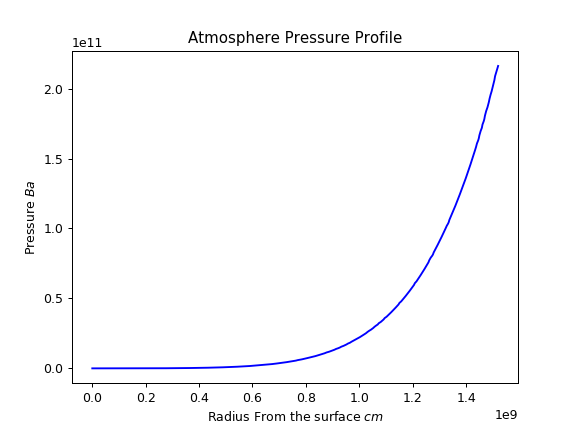

Text(0.5,1,'Atmosphere Pressure Profile')

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import loadtxt, optimize
import os
import sys
import pandas as pd
%matplotlib notebook
from scipy.interpolate import interp1d
from scipy import interpolate

e = 2.71828

myfile = '/Users/isaacmalsky/Desktop/Malsky/irrad_10_0.05_0.24_0.02_0.5_9.0.mod'

T, P, k_p = loadtxt('OpacityTableSolarMetal.txt' ,unpack=True, skiprows =38, usecols=[0,1,12])
opacity_function = interpolate.interp2d(T,P,k_p)


flux_dayside = (5.67e-5*6000**4 * (.464*6.9598e10/orb_sep /1.496e13)**2)*(1-.2)
Teq = (flux_dayside*(1-.2)/4.0/5.67e-5)**0.25

data = pd.read_csv(myfile, sep='     ', header=None, skiprows = 14)
lnd = (data[0])
lnT = (data[1])
lnR = (data[2])
lnPgas = (data[5])

lnd = [element.replace('D+','e') for element in lnd]
d = []
for item in lnd:
    d.append(e ** float(item))
    
lnT = [element.replace('D+','e') for element in lnT]
T = []
for item in lnT:
    T.append(e ** float(item))
    
    
lnR = [element.replace('D+','e') for element in lnR]
R = []

max_rad = e ** float(lnR[0])
for item in lnR:
    R.append(abs(e ** float(item) - max_rad))
    #R.append(e ** float(item))
    
lnPgas = [element.replace('D+','e') for element in lnPgas]
Pgas = []
for item in lnPgas:
    Pgas.append(e ** float(item))
    
pressure_function = interp1d(R, Pgas)
column_depth = 2 / (opacity_function(Teq, 1e5))

for i in range(1000):
    pressure = (pressure_function(column_depth[0]))
    column_depth = 2 / (opacity_function(Teq, pressure))
print ("Pressure: ", pressure)
print ("Column Depth: ", column_depth)   
    
#print (Pgas)
#plt.plot(R, T, 'b', label = '')
#plt.xlabel('Radius above the core $cm$', fontsize = 10)
#plt.ylabel('Temperature $K$', fontsize = 10)
#plt.title('Atmosphere Temperature Profile', fontsize = 12)
#plt.savefig('/Users/isaacmalsky/Desktop/Profile1.png',dpi=1000)

plt.plot(R, Pgas, 'b', label = '')
plt.xlabel('Radius From the surface $cm$', fontsize = 10)
plt.ylabel('Pressure $Ba$ ', fontsize = 10)
plt.title('Atmosphere Pressure Profile', fontsize = 12)
#plt.savefig('/Users/isaacmalsky/Desktop/Profile2.png',dpi=1000)

